<a href="https://colab.research.google.com/github/RichardTesla/datal/blob/main/Volatility_%26_Statistical_Related_Risk_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Theme : Statistical Related Risk: Volatility & Statistical Related Risk: Correlation

## Onukwufor Chizaram Richard

# Section 1.1 Volatility

### a. Volatility

Volatility refers to the rate at which the price of a financial asset fluctuates, or changes, over time. It is often used as a measure of risk in the stock market, with higher volatility meaning that the price of a stock can move dramatically in a short period of time. This can result in substantial gains or losses for investors who hold these assets

### b. Types of volatility
There are several types of volatility that are commonly referred to in finance:

Historical Volatility: This measures the actual price changes of a financial asset over a specific period of time.

Implied Volatility: This is a market-based estimate of how much a stock price is expected to fluctuate in the future. It is derived from options prices and reflects the market's expectations for the future level of volatility.

Realized Volatility: This is a measure of the actual price changes of a financial asset over a specific period of time, adjusted for dividends and other cash flows.

Local Volatility: This measures the volatility of a financial asset at a specific point in time and space, taking into account the current price and rate of change of the asset.

Stochastic Volatility: This type of volatility models the changes in the volatility of a financial asset over time as a random process.

Each of these flavors of volatility serves a different purpose and provides different information to market participants.


### c. How to compute historical volatility

In order to compute historical volatility, we simply use formula for standard deviation of past market prices. This can easily be done by using the following steps:

1.Security’s past prices (price series) are collected.
2.Mean price of the series is calculated.
3.Differences between individual prices and mean price are calculated.
4.Differences from the previous steps are squared.
5.Squared differences from the previous step are added together.
6.The sum of squared differences is divided by the total number of prices in the series minus 1 (this gives the variance). (The rationale behind using (n-1) while estimating variance is that this leads to an unbiased estimator of variance.)
7.Square-root of variance is taken.


### d. Formula
Equations for standard deviation:

$\sigma_{security} = \surd[(∑_{t=1}^n(y_t - \bar{y_t})^2)\div(t-1)]$

where
- $\sigma_{security}$ = volatility of a stock (*security*) price in the past $n$ days,
- $y_t$ = the stock price at time $t$,
- $ \bar{y_t}$ = the average stock price for a given time interval.

### e. How to compute Implied Volatility
In order to compute Implied Volatility, we observe the price of an option (for a given strike and given maturity). Using this price, we back-calculate the σ parameter one has to push into the Black-Scholes formula in order to
find that market observed price. As it turns out, the market has adjusted for the shortcomings of the Black–Scholes model and the market-implied distribution is not lognormal anymore. However, the beauty of the Black–Scholes formula is that we can tune our σ parameter such that we match this market price of the option. Clearly, this computation can only be done if there are option quotes available in the market.

# Section 1.2 Correlation



### a. Correlation
Correlation refers to the relationship between two variables, typically measured on a scale from -1 to 1. A positive correlation means that as one variable increases, the other variable tends to increase as well. A negative correlation means that as one variable increases, the other tends to decrease. A correlation of zero means that there is no relationship between the variables.

In finance, correlation is used to understand the relationship between two different financial assets or between a financial asset and an external factor, such as economic indicators. For example, a high positive correlation between two stocks might indicate that they are likely to move in the same direction, while a low or negative correlation might suggest that they are not likely to be impacted by the same factors. Understanding correlations can be useful for portfolio management, as it can help investors to diversify their portfolios and reduce overall risk.

There are three common measures of correlation are Pearson correlation, Spearman rank correlation, Kendall rank correlation.
The assumptions behind all three measures are specified below.

### Pearson Correlation
Both variables should have a pair of values.
Both variables should be continuous.
Both variables should be normally distributed.
Outliers should be absent.
Pearson Correlation assumes linearity and homoscedasticity.

### Spearman Rank Correlation and Kendall Rank Correlation
The pair of observations should be independent.
The two variables under consideration should be measured on an interval, ordinal or ratio scale.
Both these measures assume there is a monotonic relationship between the two variables under consideration.




Given a variety of securities traded on the financial market, some of these securities express a linear relationship in prices, that is, as the price of one security moves up/down, another security's price moves up/down depending on the relationship. Hence, the commonly used metric used for calculating correlation is Pearson correlation coefficient.

Portfolio managers uses correlation as a measure of risk of a group of assets in a portfolio. Highly correlated assets in a portfolio are more risky compared to less correlated. Correlation is linked to diversification of an investment portfolio. Investors use correlation to minimise certain risk and therefore preferably invest in assets that are not correlated (Hayes, 2022).

Correlation between stocks can be either negative or positive. It is calculated as a correlation coefficient which has a values that ranges from -1 to 1 inclusively.

### b. How to compute Pearson correlation

Steps:

1. Gather past market price data for your $asset_x$ and $asset_y$ variable.
2. Calculate the average price of both $asset_x$ and $asset_y$.
3. Subtract the average price of $asset_x$ from each price of $asset_x$. Repeat this step 3 for $asset_y$.
4. Compute the product of each difference between price of $asset_x$ and the the average price of $asset_x$, with that of the corresponding differences of $aaset_y$.
5. Compute the square of these differences and add the results.
6. Determine the square root of the result obtained in Step 5.
7. Divide the result in Step 4 by the resut obtained in Step 6.

### c. Formula

 $top = \sum(asset_x - \bar{x})(asset_y - \bar{y})$

 $bottom = \surd[\sum(asset_x - \bar{x})^2 * ∑(asset_y - \bar{y})^2]$

$r_{x,y} = top\div bottom$

where;

- $r_{x,y}$ = correlation coefficient between $asset_x$ and $asset_y$,

- $\bar{x}$ = average price of $asset_x$,

- $\bar{y}$ = average price of $asset_y$,


## Section 2: concepts explained using at least two asset classes with real-world data.

*(2-4 pages), illustrate what you wrote about with original examples
using real-world data. Your group will import historical datasets. The asset class, frequency, and country are all choices your group makes.*

### Volatility and correlation using real-world data

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web

pd.options.display.float_format = "{:,.4f}".format

import datetime as dt
from datetime import date

import matplotlib as mpl
mpl.style.use("seaborn")

In [ ]:
# specify time frame
# start = dt.date(2017, 11, 25)
# end = dt.date(2021, 11, 22)
start = dt.date.today()-dt.timedelta(365*5)
end = dt.date.today()

# chosen assets' ticker symbols
tickers = ["CBBTCUSD", "sp500"]

# Get the prices for the past 5 years
prices = web.DataReader(tickers, "fred", start, end)

# Rename column to make names more intuitive
prices = prices.rename(columns={"CBBTCUSD": "bitcoin", "sp500": "sp500"})
# drop missing vlaues
prices = prices.dropna()

# compute returns of each series
prices["sp500_rt"] = np.log(prices.sp500) - np.log(prices.sp500.shift(1))
prices["bitcoin_rt"] = np.log(prices.bitcoin) - np.log(prices.bitcoin.shift(1))

# filter returns data
prices = prices.iloc[1:,:]

# calculate the mean prices
ave_price_sp500 = prices.sp500_rt.mean()
ave_price_btc = prices.bitcoin_rt.mean()

# calculate the differences
prices["sp500_diff"] = (prices["sp500_rt"] - ave_price_sp500)
prices["btc_diff"] = (prices["bitcoin_rt"] - ave_price_btc)
prices["btc_sp500_diff"] = (prices["sp500_diff"] * prices["btc_diff"])

# Calculate squared differences
prices["sp500_sqrd_diff"] = (prices["sp500_diff"])**2
prices["btc_sqrd_diff"] = (prices["btc_diff"])**2

# sum the squared differences together
sp500_ss_diff = prices.sp500_sqrd_diff.sum()
btc_ss_diff = prices.btc_sqrd_diff.sum()
btc_sp500_ss_diff = prices.btc_sp500_diff.sum()

# compute variance of each series
sp500_var = sp500_ss_diff/(len(prices) -1)
bitcoin_var = btc_ss_diff/(len(prices) -1)

# compute volatility (standard deviation)
vol_sp500 = sp500_var**0.5
vol_bitcoin = bitcoin_var**0.5

# compute correlation between S&P500 and Bitcoin
corr = (btc_sp500_ss_diff/(sp500_ss_diff*btc_ss_diff)**0.5)

print(f"\nThe standard deviation (volatility) of S&P500 is {vol_sp500.round(4)}.")
print(f"=="*30)
print(f"\nThe standard deviation (volatility) of Bitcoin is {vol_bitcoin.round(4)}.")
print(f"=="*30)
print(f"\nThe correlation between Bitcoin and S&P500 is {corr.round(4)}.")
print(f"=="*27)

NameError: ignored

### Verification of the above calculations using other methods

In [ ]:
# Verification using std and corr function
vol_sp500 = prices.sp500_rt.std()
vol_btc = prices.bitcoin_rt.std()

# filter required cols
df = prices[["sp500_rt", "bitcoin_rt"]]

# correlation of sp500 and bitcoin
corr_coef = df.corr()

# display the results
print(f"Volatility:\n")
print(f"1. S&P500: {vol_sp500.round(4)} \n2. Bitcoin: {vol_btc.round(4)}")
print(f"\nCorrelation between S&P500 and Bitcoin:\n1. r = {corr_coef.iloc[1,0].round(4)}.")

Volatility:

1. S&P500: 0.0136 
2. Bitcoin: 0.0486

Correlation between S&P500 and Bitcoin:
1. r = 0.2682.


### *Step 5: Show side-by-side graphs that illustrate the presence and absence of the item.*

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [ ]:
data = pd.DataFrame(index=np.array(["Bitcoin", "SP500"]))
data["Volatility"] = [vol_btc, vol_sp500]
data.head()

,Volatility
Bitcoin,0.0486
SP500,0.0136


In [ ]:
prices.head()

,bitcoin,sp500,sp500_rt,bitcoin_rt,sp500_diff,btc_diff,btc_sp500_diff,sp500_sqrd_diff,btc_sqrd_diff
DATE,,,,,,,,,
2017-10-26,"5,891.6100","2,560.4000",0.0013,0.0261,0.0010,0.0251,0.0000,0.0000,0.0006
2017-10-27,"5,780.0000","2,581.0700",0.0080,-0.0191,0.0077,-0.0201,-0.0002,0.0001,0.0004
2017-10-30,"6,124.1600","2,572.8300",-0.0032,0.0578,-0.0035,0.0569,-0.0002,0.0000,0.0032
2017-10-31,"6,445.0100","2,575.2600",0.0009,0.0511,0.0006,0.0501,0.0000,0.0000,0.0025
2017-11-01,"6,783.6900","2,579.3600",0.0016,0.0512,0.0013,0.0503,0.0001,0.0000,0.0025


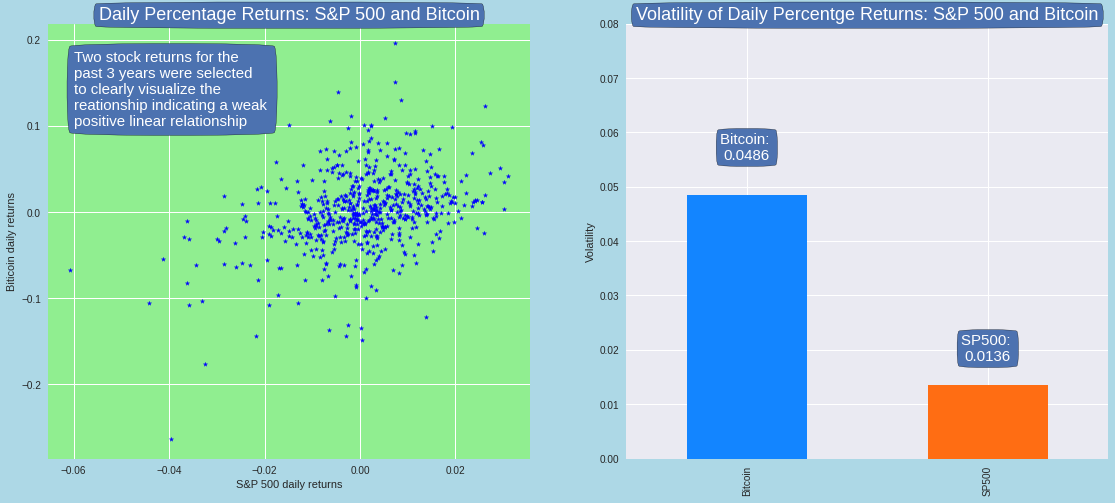

In [ ]:
from pandas.io.formats.style_render import StylerRenderer
fig, ax = plt.subplots(1, 2, figsize=(19, 8))
fig.set_facecolor('lightblue')

# Add labels to the plot
style = dict(size=15, color='white')


past_3_years = prices.loc[date.today() - dt.timedelta(365*2.5) : date.today()]

past_3_years.plot(kind="scatter", x="sp500_rt", y="bitcoin_rt", ax=ax[0], color="blue", marker="*")
data.plot(kind="bar", y="Volatility", ax=ax[1], legend=False, color=["#1385ff", "#ff6d13"])

ax[0].set_xlabel("S&P 500 daily returns")
ax[0].set_ylabel("Biticoin daily returns")
ax[0].text(-0.06, 0.1, "Two stock returns for the \npast 3 years were selected \nto clearly visualize the \nreationship indicating a weak \npositive linear relationship", **style, ha="left", bbox=dict(boxstyle="round4, pad=.5", alpha=1))
ax[0].set_title("Daily Percentage Returns: S&P 500 and Bitcoin", bbox=dict(boxstyle="round4", alpha=2), va="top", size=18, color="white")
ax[0].set_facecolor("lightgreen")

# Remove the border on the margin
for _spine in ["right", "top", "left", "bottom"]:
  ax[0].spines[_spine].set_visible(False)

ax[1].set_ylim(0, 0.08)
ax[1].set_ylabel("Volatility")
ax[1].set_title("Volatility of Daily Percentge Returns: S&P 500 and Bitcoin", bbox=dict(boxstyle="round4", alpha=1), va="top", size=18, color="white")
ax[1].text(0, 0.055, "Bitcoin: \n"+ str(vol_btc.round(4)), ha="center", **style, bbox=dict(boxstyle="round4", alpha=2))
ax[1].text(1, 0.018, "SP500: \n"+ str(vol_sp500.round(4)), ha="center", **style, bbox=dict(boxstyle="round4", alpha=2))
fig.show();

### Step 6:

*Using research papers or financial newspapers (NOT WIKIPEDIA), in 2 to 3
pages, summarize concepts explained using real-world applications. This is different from the previous examples because it doesn’t require specific datasets, it does NOT require coding, and it should NOT be an original example, but it should be from a serious reference such as a journal article or reputable news source.*

### Relationship between Volatility and Correlation
The relationship between volatility and correlation has been a topic of interest for academics and practitioners alike. Initially, it might appear that quantifying this relationship is simple if correlations and volatilites don’t change with time. But, more often than not, there are abrupt changes observed in correlations and volatilites due to a variety of reasons including structural breaks in the underlying mechanisms which determine returns for various asset classes.

This paper [8] makes some interesting observations while trying to establish a relationship between volatility and correlation of returns for various asset classes. It mentions that in periods of increased market volatility, the correlations between returns of various asset classes tends to increase (this is with relative to correlations observed during periods of normal volatility).

The most common explanation provided for such a phenomenon is that during periods of heightened volatility, there is an inherent change in the underlying mechanisms which drive returns for various asset classes. Although, the paper makes an interesting point here as well. It mentions that using probability theory, one can argue that correlations between asset returns depend on market volatility even if the underlying relationships between returns has not changed (i.e. changes in correlations measured over an extended period of time can simply be due to changes in realized market volatility).




###Implications of the relationship between Volatility and Correlation
The relationship between volatility and correlation has interesting implications for practitioners.

Risk managers often use data from a relatively short lookback while estimating correlations and volatilities. Also, sometimes estimation methods apply geomterically reducing weights to observations in the more distant past. The relationship discussed above leads to the conclusion that using shorter lookbacks for volatility and correlation calculations can be a big mistake. If the considered lookback is a period with relatively stable markets, it would lead to lower estimated volatilites and lower estimated correlations. This might overstate the extent of diversification in the portfolio and thus, the portfolio can be unknowingly risky. Similarly, if the considered lookback is a period with heighted volatility, it would lead to higher estimated correlations and thus can result in a overly risk-averse portfolio.

On the other hand, taking larger lookbacks isn’t always a good solution as well. Financial markets are adaptive and they change. Hence, using data from too distant a past would not be useful.

Thus, for while selecting lookbacks for volatility and correlation calculations, one should not be ignoring periods of increased or decreased volatilites since they have considerable information about the underlying relationship between asset returns.

This relationship also has implications for risk managers who are responsible for stress-testing portfolios. The method used for stress testing a portfolio must not exclude the empirical feature that periods of high volatilites often lead to higher correlations among various asset returns.

In conclusion, this observation totally defeats the overall idea of diversification. The idea of diversification is to invest in various different asset classes which are not highly correlated to weather out periods of high volatilities. But, if the observations made in this paper are significant, diversification alone won’t help the investors in sailing through periods of high volatilites.

## References

1. Adam Hayes, Implied Volatility vs Historical Volatility, https://www.investopedia.com/articles/investing-strategy/071616/implied-vs-historical-volatility-main-differences.asp
2.https://www.kaggle.com/code/kiyoung1027/correlation-pearson-spearman-and-kendall/report
3.https://www.statisticshowto.com/kendalls-tau/
4.https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/spearman-rank-correlation/
5.Mackay, K. "What is Volatility Index (VIX)?". 22 Sept 2021. https://www.valuethemarkets.com/education/what-is-volatility-index-vix
6.CFI Team. "Volatility". 4 Feb 2022. https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/volatility-vol/
7.Danbarkhorn. "Crypto-correlation." Kaggle. 10 Sep 2019. https://www.kaggle.com/code/dbarkhorn/crypto-correlation/notebook.
8.Loretan, Mico & English, B William, Evaluating changes in correlations during periods of high market volatility, https://www.bis.org/publ/r_qt0006e.pdf
9.https://bookdown.org/maxime_debellefroid/MyBook/all-about-volatility.html
